In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import cymetric as cym
from cymetric import timeseries
import pandas as pd
import numpy as np
import sqlite3 as lite
import os
import sys 
sys.path.insert(0, '../../../../scripts/')
import output as oup
import functions as fn

In [2]:
starter_string = 'Temp'
scenario_nums = ['750','800','850','900','950','1000']

In [3]:
df_p = oup.initialize_df(scenario_index=starter_string,
                                 scenarios_nums=scenario_nums)

In [4]:
output_start = '../../../../cyclus-files/oat/pyre/ref-temp/temp'
cur_dict = {}
for x in range(len(scenario_nums)): 
    output_file = output_start + scenario_nums[x]+'.sqlite'
    cur_dict[scenario_nums[x]] = fn.get_cursor(output_file)

In [5]:
nucnum = [10030000,60140000,360860000,380900000,390900000,400950000,420950000,430990000,441010000,451030000,
461070000,471090000,521320000,531290000,541290000,551370000,561330000,571390000,581440000,591440000,601430000,
601450000,611470000,621470000,621490000,621500000,621510000,621520000,631530000,641550000,922340000,922350000,
922360000,922380000,932370000,942380000,942390000,942400000,942410000,942420000,952410000,952430000,962430000,
962440000,962450000]

In [6]:
dict_1 = {}
dict_2 = {}
dict_3 = {}
dict_4 = {}
dict_5 = {}
dict_6 = {}


for x in range(len(nucnum)):
    num = nucnum[x]
    dict_1 = fn.isotope_total_cum(cur_dict[scenario_nums[0]],num,dict_1)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_2 = fn.isotope_total_cum(cur_dict[scenario_nums[1]],num,dict_2)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_3 = fn.isotope_total_cum(cur_dict[scenario_nums[2]],num,dict_3)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_4 = fn.isotope_total_cum(cur_dict[scenario_nums[3]],num,dict_4)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_5 = fn.isotope_total_cum(cur_dict[scenario_nums[4]],num,dict_5)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_6 = fn.isotope_total_cum(cur_dict[scenario_nums[5]],num,dict_6)

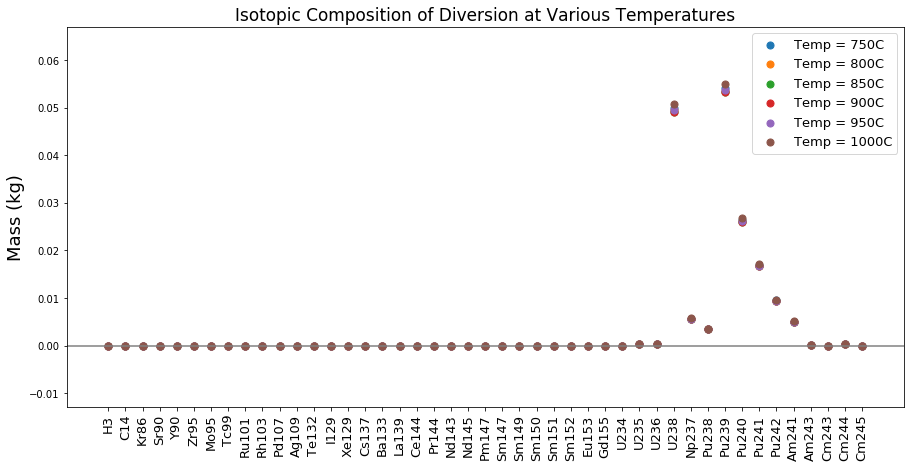

In [7]:
init_yr, init_month, duration, timestep = fn.get_timesteps(cur_dict[scenario_nums[0]])
key_list = list(dict_1.keys())
y_pos = np.arange(len(key_list))
w = 45
h = 6
stream_ = [[0 for x in range(w)] for y in range(h)]

z=1
n=0
for key in key_list:
    temp1 = list(dict_1[key])
    temp2 = list(dict_2[key])
    temp3 = list(dict_3[key])
    temp4 = list(dict_4[key])
    temp5 = list(dict_5[key])
    temp6 = list(dict_6[key])
    stream_[0][n] = temp1[z]
    stream_[1][n] = temp2[z]
    stream_[2][n] = temp3[z]
    stream_[3][n] = temp4[z]
    stream_[4][n] = temp5[z]
    stream_[5][n] = temp6[z]
    n = n+1
    
name_list = ['H3','C14','Kr86','Sr90','Y90','Zr95','Mo95','Tc99','Ru101','Rh103',
             'Pd107','Ag109','Te132','I129','Xe129','Cs137','Ba133','La139','Ce144',
             'Pr144','Nd143','Nd145','Pm147','Sm147','Sm149','Sm150','Sm151','Sm152',
             'Eu153','Gd155','U234','U235','U236','U238','Np237','Pu238','Pu239',
             'Pu240','Pu241','Pu242','Am241','Am243','Cm243','Cm244','Cm245']  
    
#plt.scatter(range(1,46),stream_[0])  

fig, ax = plt.subplots(figsize=(15,7))
plt.axhline(y=0,color='grey')
ax.scatter(range(0,45),stream_[0], label='Temp = 750C', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[1], label='Temp = 800C', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[2], label='Temp = 850C', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[3], label='Temp = 900C', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[4], label='Temp = 950C', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[5], label='Temp = 1000C', marker = "o", s = 50)
box = ax.get_position()
ax.set_position([box.x0,box.y0 + box.height,box.width,box.height*1])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(y_pos,name_list,rotation=90,fontsize=13)
ax.legend(handles, labels, fontsize=13,loc='best',fancybox=True)
ax.set_ylabel('Mass (kg)', fontsize=18)
ax.set_title('Isotopic Composition of Diversion at Various Temperatures' , fontsize=17)
plt.savefig('temperature-sa-comp.png', bbox_inches="tight")

In [18]:
diff_ = [[0 for x in range(w)] for y in range(h)]
percent_ = [[0 for x in range(w)] for y in range(h)]

#for i in range(len(key_list)):
#    diff_[0][i] = stream_[0][i] - stream_[5][i]
#    diff_[1][i] = stream_[1][i] - stream_[5][i]
#    diff_[2][i] = stream_[2][i] - stream_[5][i]
#    diff_[3][i] = stream_[3][i] - stream_[5][i]
#    diff_[4][i] = stream_[4][i] - stream_[5][i]

for x in range(0,6):
    for y in range(len(key_list)):
        tmp = stream_[x][y] - stream_[3][y]
        if tmp == 0:
            diff_[x][y] = tmp
        else:
            diff_[x][y] = tmp * 1000
            percent_[x][y] = (tmp / stream_[3][y]) * 100
            
print(percent_)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.6715200541087956, 1.6715200541087705, 1.671520054108772, 1.6715200541087598, 1.6715200541087876, 1.6715200541087902, 1.6715200541087754, 1.671520054108803, 1.6715200541087702, 1.671520054108787, 1.671520054108784, 1.671520054108798, 1.671520054108776, 1.6715200541087705, 1.671520054108774], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.715492781240051, 0.7154927812400662, 0.7154927812400591, 0.715492781240048, 0.7154927812400397, 0.7154927812400704, 0.7154927812400568, 0.7154927812400625, 0.7154927812400455, 0.7154927812400558, 0.7154927812400571, 0.715492781240042, 0.715492781240029, 0.7154927812400356, 0.7154927812400389], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.035906597728466674, 0.035906597728456065, 0.03590659772845588, 0.03590659772847226, 0.035906597728468305, 0.035906597728468465, 0.035

Text(0.5, 1.0, 'Various Temperatures compared to 750C')

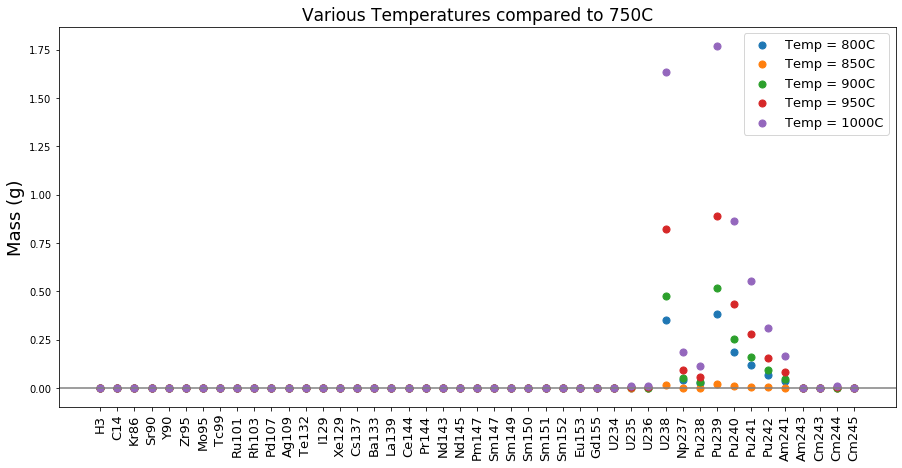

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
plt.axhline(y=0,color='grey')
ax.scatter(range(0,45),diff_[1], label='Temp = 800C', marker = "o", s = 50)
ax.scatter(range(0,45),diff_[2], label='Temp = 850C', marker = "o", s = 50)
ax.scatter(range(0,45),diff_[4], label='Temp = 900C', marker = "o", s = 50)
ax.scatter(range(0,45),diff_[0], label='Temp = 950C', marker = "o", s = 50)
ax.scatter(range(0,45),diff_[5], label='Temp = 1000C', marker = "o", s = 50)
box = ax.get_position()
ax.set_position([box.x0,box.y0 + box.height,box.width,box.height*1])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(y_pos,name_list,rotation=90,fontsize=13)
ax.legend(handles, labels, fontsize=13,loc='best',fancybox=True)
ax.set_ylabel('Mass (g)', fontsize=18)
ax.set_title('Various Temperatures compared to 750C' , fontsize=17)